# Prosper Loan EDA
## by Islam Abdelsalam

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> You can find the explaination of variables <a href="https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0">here</a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

%matplotlib inline

In [2]:
# Loading Dataset
df= pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# checking information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

>- Convert ListingCreationDate to Datetime object
>- Convert Loan Status, Occupation, EmploymentStatus, IncomeRange to categorical

In [4]:
# Checking the unique values of different columns..
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [5]:
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [6]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [7]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [8]:
# Converting Income Range to Categorical type ..
val = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
Cat = pd.api.types.CategoricalDtype(val,True)
df.IncomeRange = df.IncomeRange.astype(Cat)

In [9]:
# Converting ListingCreationDate to Datetime object
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> We are interested in valuable columns like ListingCreationDate, LoanStatus, BorrowerAPR, Occupation, EmploymentStatus, IsBorrowerHomeowner, IncomeRange, StatedMonthlyIncome, and LoanOriginalAmount.


## Univariate Exploration

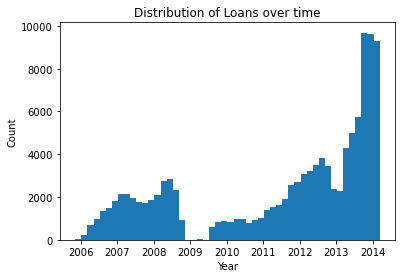

In [10]:
plt.hist(data=df,x='ListingCreationDate',bins=50);
plt.title('Distribution of Loans over time')
plt.xlabel('Year');
plt.ylabel('Count');

>- It's clear that the demand is increasing over time .. there is a sudden decrease in late 2008 and early 2009 which is propably associated with the financial crisis

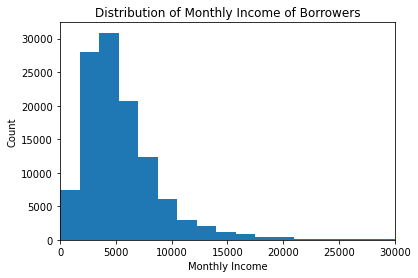

In [11]:
plt.hist(df.StatedMonthlyIncome,bins=1000);
plt.xlim((0,30000))
plt.title('Distribution of Monthly Income of Borrowers');
plt.xlabel('Monthly Income');
plt.ylabel('Count');

>- The shape is highly skewed to the right which makes sense as richer people are less likely to need loans

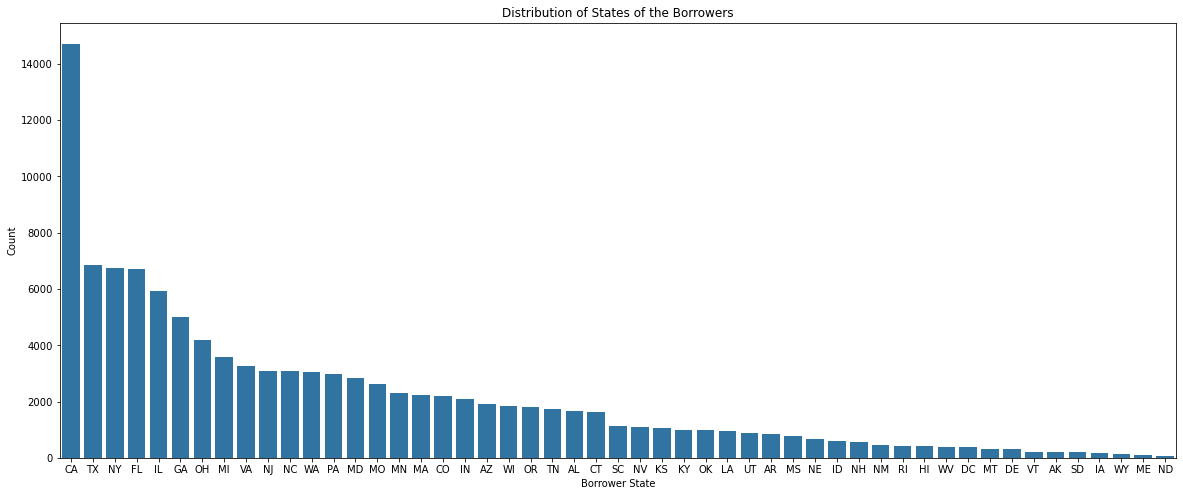

In [12]:
plt.figure(figsize=(20,8))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='BorrowerState', color=base_color, order=df.BorrowerState.value_counts().index);
plt.title("Distribution of States of the Borrowers");
plt.xlabel('Borrower State');
plt.ylabel('Count');

>- People of California are at least twice more likely to get a loan than any other state, followed by Texas, New York, and Florida.

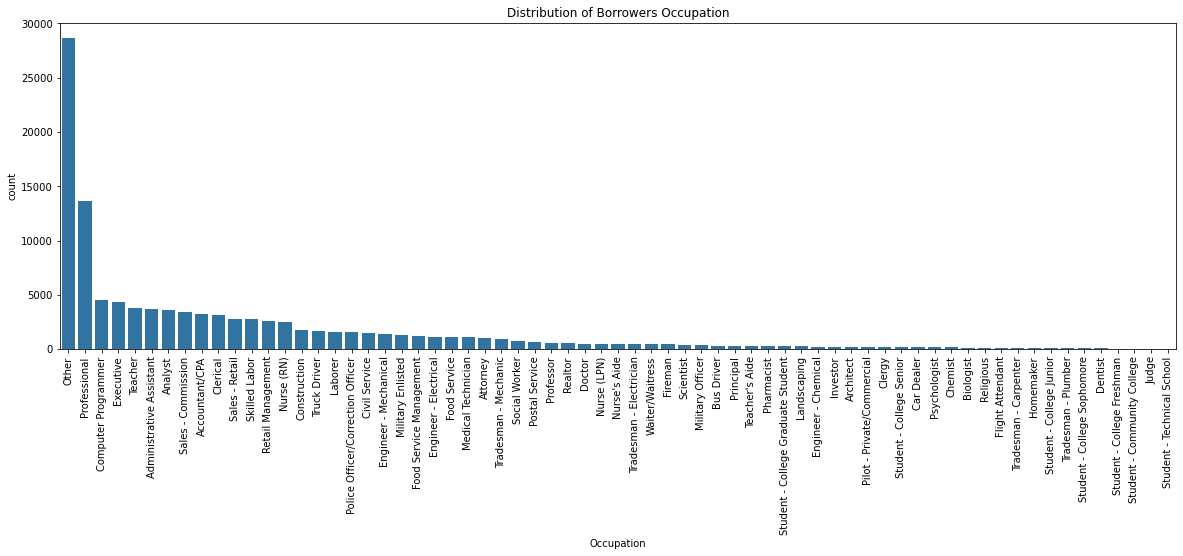

In [13]:
plt.figure(figsize=(20,6))
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='Occupation', color=base_color, order=df.Occupation.value_counts().index);
plt.title('Distribution of Borrowers Occupation')
plt.xticks(rotation=90);

>- Different People in different jobs needs loan they are not limited to a certain industry or hierarchy.

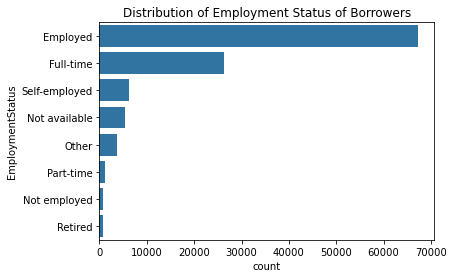

In [14]:
#plt.figure(figsize=(12,20))
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='EmploymentStatus', color=base_color, order=df.EmploymentStatus.value_counts().index);
plt.title('Distribution of Employment Status of Borrowers');

>- Most of the people who get accepted for loans are Employed which makes sense to be able to pay back to the bank

In [15]:
# Returns the sum of all not-null values in `IsBorrowerHomeowner` column
n_df = df['IsBorrowerHomeowner'].value_counts().sum()

# Return the highest frequency in the `IsBorrowerHomeowner` column
max_count = df['IsBorrowerHomeowner'].value_counts()[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_count / n_df
tick_props = np.arange(0, max_prop+0.1, 0.1)
tick_props

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.10', '0.20', '0.30', '0.40', '0.50']

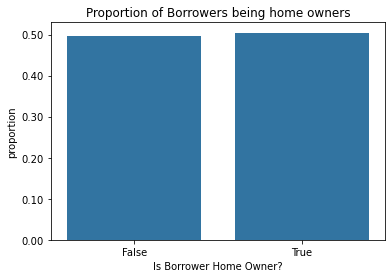

In [16]:
sns.countplot(data=df, x='IsBorrowerHomeowner', color=base_color)
# Change the tick locations and labels
plt.yticks(tick_props * n_df, tick_names)
plt.ylabel('proportion');
plt.title("Proportion of Borrowers being home owners");
plt.xlabel('Is Borrower Home Owner?');

>- There is no significant difference between the proportions of home owners and not home owners

## Bivariate Exploration

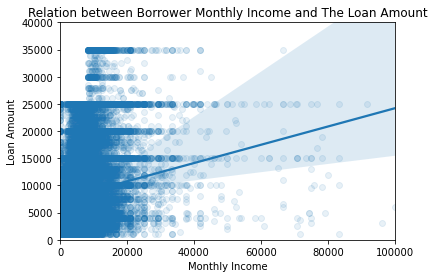

In [17]:
sns.regplot(data=df, x='StatedMonthlyIncome', y='LoanOriginalAmount',scatter_kws={'alpha':0.1})
plt.xlim((0,100000))
plt.ylim((0,40000))
#plt.xscale('log')
#plt.yscale('log')
plt.title("Relation between Borrower Monthly Income and The Loan Amount");
plt.xlabel('Monthly Income');
plt.ylabel('Loan Amount');

>- Borrowers with Higher Monthly Income are more likely to get higher loans

In [18]:
df['loan_status'] = df.LoanStatus.apply(lambda x: x.split()[0])

st_counts = df.query('loan_status !="Current"').groupby(['IncomeRange', 'loan_status']).size()/df.query('loan_status !="Current"').groupby(['IncomeRange']).size()
st_counts

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
#st_counts = df.groupby(['IncomeRange', 'loan_status']).size()
#st_counts

# Use Series.reset_index() to convert a series into a dataframe object
st_counts = st_counts.reset_index(name='count')
st_counts

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
st_counts = st_counts.pivot(index = 'IncomeRange', columns = 'loan_status', values = 'count')
st_counts

loan_status,Cancelled,Chargedoff,Completed,Defaulted,FinalPaymentInProgress,Past
IncomeRange,,,,,,
Not displayed,0.000517,0.178272,0.595530,0.225681,0.000000,0.000000
Not employed,0.000000,0.326165,0.582437,0.044803,0.000000,0.046595
$0,0.000000,0.303279,0.606557,0.083607,0.000000,0.006557
"$1-24,999",0.000000,0.280498,0.613761,0.070494,0.002955,0.032292
"$25,000-49,999",0.000059,0.243663,0.637609,0.075523,0.002869,0.040279
"$50,000-74,999",0.000000,0.195981,0.690882,0.065054,0.004764,0.043320
"$75,000-99,999",0.000000,0.170134,0.725100,0.055334,0.003837,0.045595
"$100,000+",0.000000,0.150755,0.743498,0.050148,0.008098,0.047500


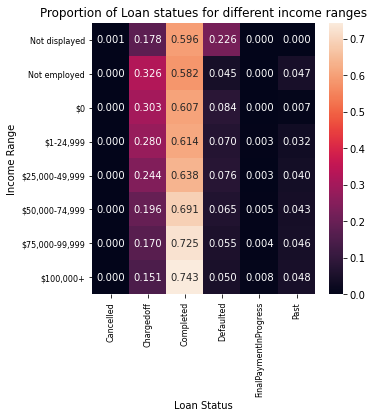

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(st_counts, annot = True,fmt='0.3f');
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);
plt.title("Proportion of Loan statues for different income ranges");
plt.xlabel('Loan Status');
plt.ylabel('Income Range');

>- It's clear that the higher is the Borrower's income range, The higher the chance of completing the loan payments 

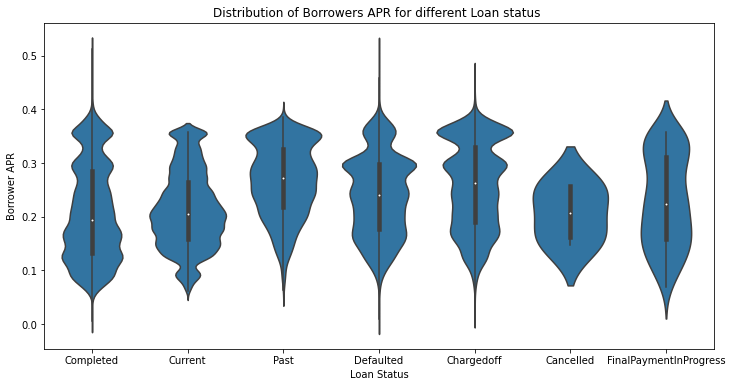

In [20]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='loan_status', y='BorrowerAPR',color=base_color);
plt.title("Distribution of Borrowers APR for different Loan status ");
plt.xlabel('Loan Status');
plt.ylabel('Borrower APR');

>- The median of APR for those who completed the loan are slightly lower than those who got past the deadline

## Multivariate Exploration


In [21]:
df['CreditScoreMed']=0.5*(df['CreditScoreRangeLower']+df['CreditScoreRangeUpper'])

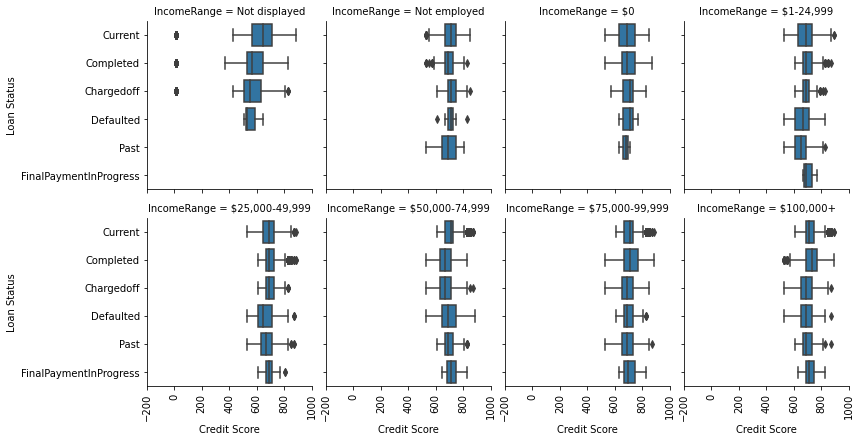

In [22]:
g=sns.FacetGrid(data=df,col='IncomeRange',col_wrap=4,margin_titles=True).map(sns.boxplot,"CreditScoreMed","loan_status")
clear_output()
g.set_xticklabels(rotation=90);
# Relation between Loan Status and Med of Credit Score for each Income Range
g.set_xlabels('Credit Score');
g.set_ylabels('Loan Status');

>- There is no significant evidence of relation between the credit score and loan status for different income ranges.